In [1]:
import numpy as np 
from sklearn.metrics import confusion_matrix
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('clean_lending_dataset.csv')
df = df.dropna()
df.columns.values


array(['Unnamed: 0', 'emp_title', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'installment', 'int_rate', 'annual_inc',
       'tot_hi_cred_lim', 'chargeoff_within_12_mths', 'total_pymnt',
       'pub_rec_bankruptcies', 'dti', 'delinq_2yrs', 'addr_state',
       'purpose', 'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E',
       'grade_F', 'grade_G', 'sub_grade_A1', 'sub_grade_A2',
       'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1',
       'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5',
       'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4',
       'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3',
       'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2',
       'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1',
       'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5',
       'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4',
       'sub_grade_G5', 'term_ 36 

In [3]:
len(df)
sum(df.loan_status)/len(df)

0.1339960373921778

# Gradient Boosting Classifier

In [4]:
from sklearn.ensemble import GradientBoostingClassifier

X  = df.drop(['emp_title', 'loan_status', 'addr_state', 'purpose','Unnamed: 0'], axis = 1)
Y = df.loan_status 

perc_train = 0.7
mask = np.random.randint(0,high = len(X)-1, size = [int(len(X)*perc_train)])

clf1 = GradientBoostingClassifier(n_estimators=150, learning_rate=1.0,
   max_depth=1, random_state=0).fit(X.values[mask], Y.values[mask])
clf1.score(X.values[~mask], Y.values[~mask])                 

/home/yaramubarak/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.9546503080283297

0.010549598348210298


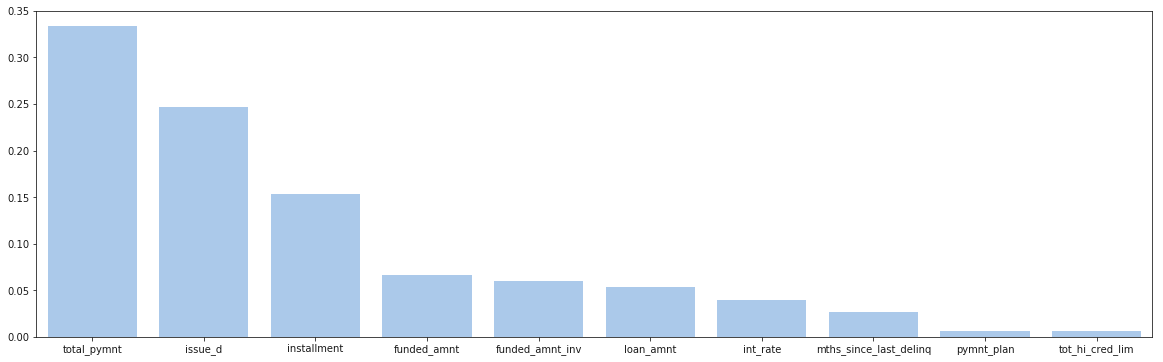

In [18]:
tn, fp, fn, tp = confusion_matrix(clf1.predict(X.values[~mask]), Y.values[~mask]).ravel()
print(fn/sum(Y.values[~mask]))
sorted_inds = np.flip(np.argsort(clf1.feature_importances_))



f, ax = plt.subplots(figsize=(20, 6))
sns.set_color_codes("pastel")
sns.barplot(x= X.columns[sorted_inds][:10], y=clf1.feature_importances_[sorted_inds][:10],
            label="Total", color="b")


# Adaboost Trees

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

X  = df.drop(['emp_title', 'loan_status', 'addr_state', 'purpose','Unnamed: 0'], axis = 1)
Y = df.loan_status 

perc_train = 0.7
mask = np.random.randint(0,high = len(X)-1, size = [int(len(X)*perc_train)])


est = DecisionTreeClassifier(max_depth=3)

clf2 = AdaBoostClassifier(base_estimator=est, n_estimators=70, learning_rate=1.0, random_state=None).fit(X.values[mask], Y.values[mask])
clf2.score(X.values[~mask], Y.values[~mask])     

In [ ]:
tn, fp, fn, tp = confusion_matrix(clf2.predict(X.values[~mask]), Y.values[~mask]).ravel()
print(fn/len(X.values[~mask]))


sorted_inds = np.argsort(clf2.feature_importances_)
f, ax = plt.subplots(figsize=(20, 6))
sns.set_color_codes("pastel")
sns.barplot(x= X.columns[sorted_inds][:10], y=clf2.feature_importances_[sorted_inds][:10],
            label="feature Importances", color="b")

ax.set( ylabel="Feature Importance",
       xlabel="Feature")



# Moral Model 

## Moral Boosted Gradient

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

X  = df.drop(['emp_title', 'loan_status', 'addr_state', 'purpose','zip_code','home_ownership_ANY', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER',
       'home_ownership_OWN', 'home_ownership_RENT','annual_inc','dti','Unnamed: 0'], axis = 1)
Y = df.loan_status 

perc_train = 0.7
mask = np.random.randint(0,high = len(X)-1, size = [int(len(X)*perc_train)])


clf3 = GradientBoostingClassifier(n_estimators=210, learning_rate=1.0,
   max_depth=1, random_state=0).fit(X.values[mask], Y.values[mask])
clf3.score(X.values[~mask], Y.values[~mask])      

0.9585781009160151

0.011463225427708822


[Text(0,0.5,'Feature Importance'), Text(0.5,0,'Feature')]

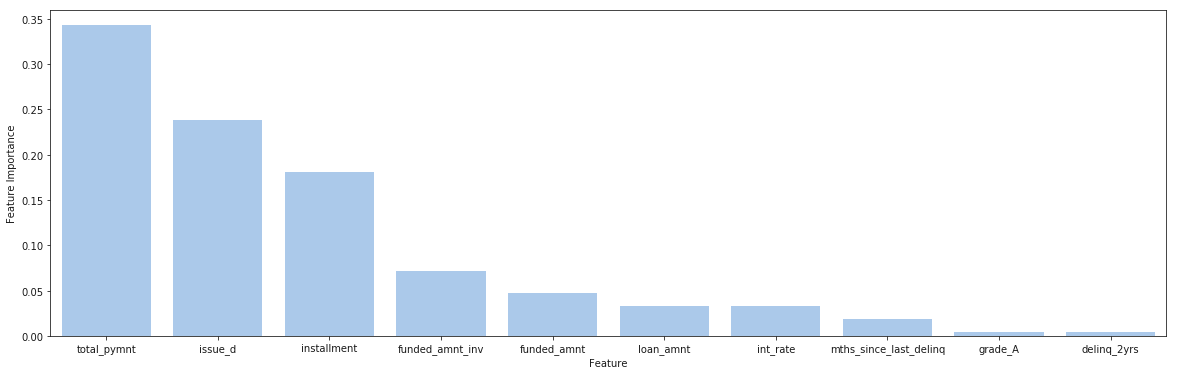

In [12]:
tn, fp, fn, tp = confusion_matrix(clf3.predict(X.values[~mask]), Y.values[~mask]).ravel()
print(fn/sum(Y.values[~mask]))

sorted_inds = np.flip(np.argsort(clf3.feature_importances_))
f, ax = plt.subplots(figsize=(20, 6))
sns.set_color_codes("pastel")
sns.barplot(x= X.columns[sorted_inds][:10], y=clf3.feature_importances_[sorted_inds][:10],
            label="feature Importances", color="b")

ax.set( ylabel="Feature Importance",
       xlabel="Feature")


In [5]:
#f, ax = plt.subplots(figsize=(10, 10))
preds_3_test = list(clf3.staged_predict(X.values[~mask]))
preds_3_train = list(clf3.staged_predict(X.values[mask]))

In [6]:
test_acc_staged_1 = np.sum(np.array(preds_3_test) == Y.values[~mask],axis = 1 )/len(Y.values[~mask])
train_acc_staged_1 = np.sum(np.array(preds_3_train) == Y.values[mask],axis = 1 )/len(Y.values[mask])

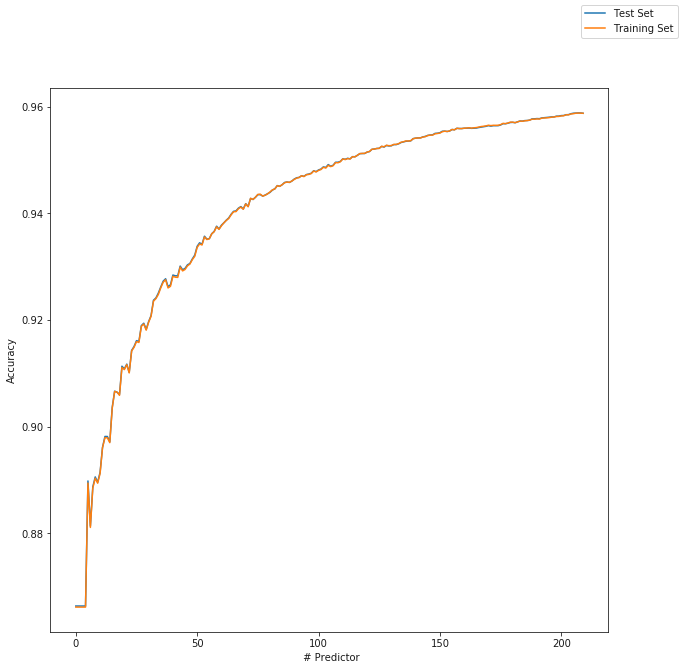

In [7]:
f, ax = plt.subplots(figsize=(10, 10))
plt.plot(test_acc_staged_1, label = 'Test Set')
plt.plot(train_acc_staged_1, label = 'Training Set')
ax.set( ylabel="Accuracy",
       xlabel=" # Predictor")
f.legend()

## Moral Adaboost

In [8]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

X  = df.drop(['emp_title', 'loan_status', 'addr_state', 'purpose','zip_code','home_ownership_ANY', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER',
       'home_ownership_OWN', 'home_ownership_RENT','annual_inc','dti','Unnamed: 0'], axis = 1)
Y = df.loan_status 

perc_train = 0.7
mask = np.random.randint(0,high = len(X)-1, size = [int(len(X)*perc_train)])


est = DecisionTreeClassifier(max_depth=3)

clf4 = AdaBoostClassifier(base_estimator=est, n_estimators=150, learning_rate=1.0, random_state=None).fit(X.values[mask], Y.values[mask])
clf4.score(X.values[~mask], Y.values[~mask])     

0.9711275859614353

0.0035486160397444995


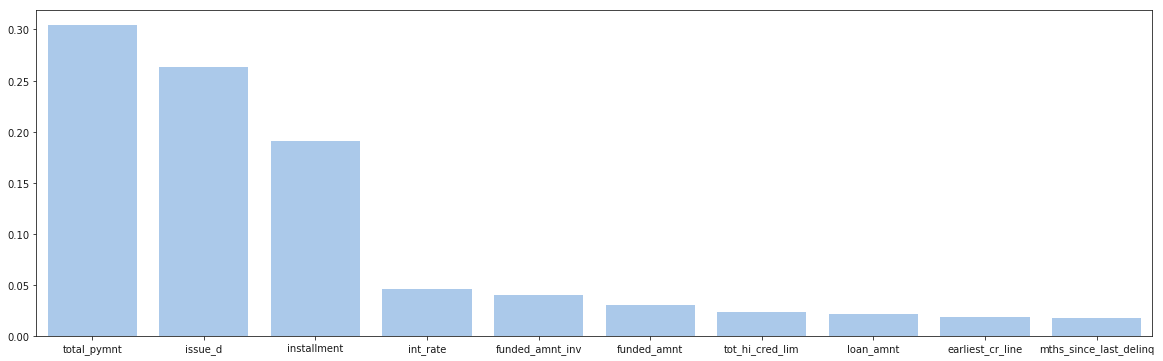

In [9]:
tn, fp, fn, tp = confusion_matrix(clf4.predict(X.values[~mask]), Y.values[~mask]).ravel()
print(fn/sum(X.values[~mask]))

sorted_inds = np.flip(np.argsort(clf4.feature_importances_))

f, ax = plt.subplots(figsize=(20, 6))
sns.set_color_codes("pastel")
sns.barplot(x= X.columns[sorted_inds][:10], y=clf4.feature_importances_[sorted_inds][:10],
            label="Total", color="b")


In [10]:
test_score_2 = clf4.staged_score(X.values[~mask], y.values[~mask])
train_score_2 = clf4.staged_score(X.values[mask], y.values[mask])

f, ax = plt.subplots(figsize=(10, 10))
plt.plot(test_score_2, label = 'Test Set')
plt.plot(train_score_2, label = 'Train Set')
ax.set( ylabel="Accuracy",
       xlabel=" # Predictor")
plt.legend()

NameError: name 'y' is not defined